# Group by 

Let's take our hvac data and look at the mean power for houses with and without solar.

In [35]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter('ignore')

In [36]:
import utils

df = utils.read_csv('data/measured_real_power.csv')
df.head()

,triplex_meter_0,triplex_meter_1,triplex_meter_2,triplex_meter_3,triplex_meter_4,triplex_meter_5,triplex_meter_6,triplex_meter_7,triplex_meter_8,triplex_meter_9,triplex_meter_10,triplex_meter_11,triplex_meter_12,triplex_meter_13,triplex_meter_14,triplex_meter_15,triplex_meter_16,triplex_meter_17,triplex_meter_18,triplex_meter_19
timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-01 00:00:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:01:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:02:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:03:00,510.912,510.912,510.912,547.924,510.912,510.912,547.924,547.924,581.637,581.637,384.146,384.146,384.146,531.494,531.494,531.494,530.845,530.845,271.123,383.677
2013-07-01 00:04:00,510.911,510.911,510.911,547.922,510.911,510.911,547.922,547.922,581.645,581.645,384.151,384.151,384.151,384.151,531.501,531.501,530.849,530.849,271.125,383.680


In [37]:
df[['triplex_meter_0']].head()

,triplex_meter_0
timestamp,
2013-07-01 00:00:00,510.912
2013-07-01 00:01:00,510.912
2013-07-01 00:02:00,510.912
2013-07-01 00:03:00,510.912
2013-07-01 00:04:00,510.911


Lets **melt** again...

In [38]:
stacked = df.reset_index().melt(id_vars='timestamp')
stacked.head()

,timestamp,variable,value
0,2013-07-01 00:00:00,triplex_meter_0,510.912
1,2013-07-01 00:01:00,triplex_meter_0,510.912
2,2013-07-01 00:02:00,triplex_meter_0,510.912
3,2013-07-01 00:03:00,triplex_meter_0,510.912
4,2013-07-01 00:04:00,triplex_meter_0,510.911


Clean up the column names

In [39]:
stacked.rename(columns = {'variable': 'meter', 'value': 'power'}, inplace=True)
stacked.head()

,timestamp,meter,power
0,2013-07-01 00:00:00,triplex_meter_0,510.912
1,2013-07-01 00:01:00,triplex_meter_0,510.912
2,2013-07-01 00:02:00,triplex_meter_0,510.912
3,2013-07-01 00:03:00,triplex_meter_0,510.912
4,2013-07-01 00:04:00,triplex_meter_0,510.911


How do we select just a few meters?  Easier than column selection?

In [40]:
filter_index = stacked['meter'].isin(['triplex_meter_0', 'triplex_meter_1'])
filter_index.head()

0    True
1    True
2    True
3    True
4    True
Name: meter, dtype: bool

In [41]:
stacked = stacked[filter_index]
stacked.head()

,timestamp,meter,power
0,2013-07-01 00:00:00,triplex_meter_0,510.912
1,2013-07-01 00:01:00,triplex_meter_0,510.912
2,2013-07-01 00:02:00,triplex_meter_0,510.912
3,2013-07-01 00:03:00,triplex_meter_0,510.912
4,2013-07-01 00:04:00,triplex_meter_0,510.911


We can check this with **pivot**

In [42]:
stacked.pivot(index="timestamp", columns="meter", values='power').head()

meter,triplex_meter_0,triplex_meter_1
timestamp,,
2013-07-01 00:00:00,510.912,510.912
2013-07-01 00:01:00,510.912,510.912
2013-07-01 00:02:00,510.912,510.912
2013-07-01 00:03:00,510.912,510.912
2013-07-01 00:04:00,510.911,510.911


Or with **pivot_table**

In [43]:
pd.pivot_table(stacked, index="timestamp", columns="meter", values='power', aggfunc="sum").head()

meter,triplex_meter_0,triplex_meter_1
timestamp,,
2013-07-01 00:00:00,510.912,510.912
2013-07-01 00:01:00,510.912,510.912
2013-07-01 00:02:00,510.912,510.912
2013-07-01 00:03:00,510.912,510.912
2013-07-01 00:04:00,510.911,510.911


## Create the base table 

We just want the mean values by **triplex_meter**.

In [44]:
mean_power = df.mean()
mean_power.head()

triplex_meter_0     197.401486
triplex_meter_1      85.223124
triplex_meter_2    1225.211889
triplex_meter_3    1018.304115
triplex_meter_4    1173.583409
dtype: float64

In [45]:
type(mean_power)

pandas.core.series.Series

In [46]:
mean_power = mean_power.reset_index()
mean_power.head()

,index,0
0,triplex_meter_0,197.401486
1,triplex_meter_1,85.223124
2,triplex_meter_2,1225.211889
3,triplex_meter_3,1018.304115
4,triplex_meter_4,1173.583409


In [47]:
mean_power.columns = ['house', 'power']
type(mean_power)

pandas.core.frame.DataFrame

In [48]:
mean_power.head()

,house,power
0,triplex_meter_0,197.401486
1,triplex_meter_1,85.223124
2,triplex_meter_2,1225.211889
3,triplex_meter_3,1018.304115
4,triplex_meter_4,1173.583409


## Read the relationship `DataFrame` 

In [49]:
import pandas as pd

housedf = pd.read_csv('data/triplex_meter_solar.csv')
housedf.head()

,triplex_meter,type
0,triplex_meter_11,nosolar
1,triplex_meter_18,nosolar
2,triplex_meter_19,solar
3,triplex_meter_10,solar
4,triplex_meter_17,solar


In [50]:
mean_power.head()

,house,power
0,triplex_meter_0,197.401486
1,triplex_meter_1,85.223124
2,triplex_meter_2,1225.211889
3,triplex_meter_3,1018.304115
4,triplex_meter_4,1173.583409


## Merge 

In [51]:
pd.merge(mean_power, housedf).head()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

One way to fix this is to tell the `merge` function which columns you want to merge on.

In [52]:
pd.merge(mean_power, housedf, left_on='house', right_on='triplex_meter').head()

,house,power,triplex_meter,type
0,triplex_meter_0,197.401486,triplex_meter_0,solar
1,triplex_meter_1,85.223124,triplex_meter_1,solar
2,triplex_meter_2,1225.211889,triplex_meter_2,nosolar
3,triplex_meter_3,1018.304115,triplex_meter_3,nosolar
4,triplex_meter_4,1173.583409,triplex_meter_4,nosolar


Another option, you can rename the columns.

In [53]:
housedf.columns = ['house', 'type']
pd.merge(mean_power, housedf).head()

,house,power,type
0,triplex_meter_0,197.401486,solar
1,triplex_meter_1,85.223124,solar
2,triplex_meter_2,1225.211889,nosolar
3,triplex_meter_3,1018.304115,nosolar
4,triplex_meter_4,1173.583409,nosolar


In [54]:
merged = pd.merge(mean_power, housedf, on='house')
merged.head()

,house,power,type
0,triplex_meter_0,197.401486,solar
1,triplex_meter_1,85.223124,solar
2,triplex_meter_2,1225.211889,nosolar
3,triplex_meter_3,1018.304115,nosolar
4,triplex_meter_4,1173.583409,nosolar


Average power by type?

In [55]:
grp = merged.groupby('type')
type(grp)

pandas.core.groupby.groupby.DataFrameGroupBy

In [56]:
grp.mean()

,power
type,
nosolar,1141.269331
solar,237.341536


We can also use the `agg` function

In [57]:
grp.agg(['mean', 'std', 'max', 'min'])

power                                     
                mean         std          max         min
type                                                     
nosolar  1141.269331  102.243551  1302.686807  999.123472
solar     237.341536  114.565510   425.965910   85.223124

What about average power by `house` by `type`?

In [58]:
merged.pivot(index='house', columns='type', values='power').head()

type,nosolar,solar
house,,
triplex_meter_0,NaN,197.401486
triplex_meter_1,NaN,85.223124
triplex_meter_10,NaN,425.965910
triplex_meter_11,1150.707959,NaN
triplex_meter_12,1088.173470,NaN


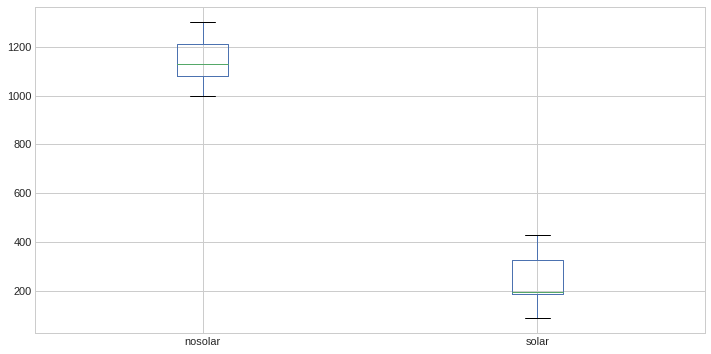

In [59]:
merged.pivot(index='house', columns='type', values='power').boxplot(return_type='axes')

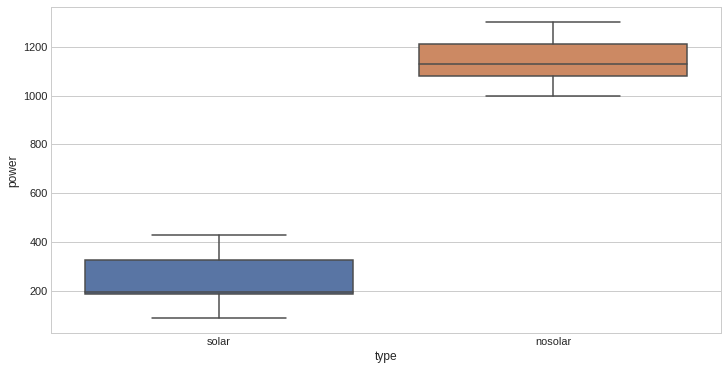

In [60]:
sns.boxplot(data=merged, y='power', x='type')